In [1]:
import numpy as np
import matplotlib.pyplot as plt

from module.tools import make_bivariate_ensemble
from module.ntbk4_routines import *

from module.generated_models import adv_lv
from module.lh import *

## Note

In this notebook, we aim by realizing different numerical experiments, to provide a better understanding in the contribution of the chemical interactions on the anisotropy dynamics.

# 1. Studying the dynamics of the anisotropies : comparing Lotka-Volterra and the Harmonic Oscillator.

The anisotry dynamics that is due to the transport is already well described by the PKF equations. However, the equations that govern them are unclosed in the PKF system. To simplify the situation, we therefore consider no transport : the chemical species stay stationnary in space.

## 1.1 Deriving the time evolution of the error statistics for the harmonic oscillator

The harmonic oscillator equations are :
$$
(1)\quad\left\{\begin{array}{l}
\frac{dA}{dt}=-k B,\\
\frac{dB}{dt}=k A,
\end{array}\right.$$
where $k = k_2$ in the Lotka Volterra problem.
As the problem is linear, the (unnormalized) errors follow the same dynamic : 
$$
(2)\quad\left\{\begin{array}{l}
\frac{de_A}{dt}=-k e_B,\\
\frac{de_B}{dt}=k e_A.
\end{array}\right.$$

Which analytical solution is given by :
<div style="background:rgba(99, 255, 71, 0.2);">
$$(3)\quad\left\{
\begin{array}{l}
e_A(t,x) = \cos(kt)e_A(t,x) -\sin(kt)e_B(t,x),\\
e_B(t,x) = \sin(kt)e_A(t,x) +\cos(kt)e_B(t,x).
\end{array}\right.$$
</div>

**Assumptions**

To simplify this study, **we assume that**:  
 1. **the initial errors, $e_A(0,x)$ et $e_B(0,x)$, are uncorrelated**,
 1. **the variance et anisotropie fields are homogeneous at initial time $t=0$**.
 

Hence, this implies $\mathbb{E}[e_A(0,x)e_B(0,x)]=0$, $\mathbb{E}[e_A(0)e_B(0)]=0$, but also $\partial_x V_A(0,x)=\partial_x V_B(0,x)=0$, and we denote by $V_A^0$ this variance field (same with B, and other fields).

**Notations**

We denote by $(\sigma_A,\sigma_B)=(\sqrt{V_A},\sqrt{V_B})$, and the notation $\varepsilon$ represents the normalized error, 
$\varepsilon = \frac{e}{\sigma}$.

**Variances dynamics**

It can be shown that :
<div style="background:rgba(99, 255, 71, 0.2);">
$$
(4)\quad\left\{
\begin{array}{l}
V_A(t,x) = \cos(kt)^2 V_A^0 +\sin(kt)^2V_B^0,\\
V_B(t,x) = \sin(kt)^2V_A^0 +\cos(kt)^2V_B^0.
\end{array}\right.$$
</div>

**Covariance dynamic**

It can be shown that :
<div style="background:rgba(99, 255, 71, 0.2);">
$$(5)\quad
V_{AB}(t,x) = \cos(kt)\sin(kt)\left( V_A(0,x)-V_B(0,x)\right).$$
</div>

**Metrics dynamics**

It can be shown that
<div style="background:rgba(99, 255, 71, 0.2);">
$$
(6)\quad\left\{
\begin{array}{l}
g_A(t,x) = \frac{1}{V_A(t,x)}\left[\cos(kt)^2 V_A^0 g_A^0 +\sin(kt)^2V_B^0 g_B^0\right],\\
g_B(t,x) = \frac{1}{V_B(t,x)}\left[\sin(kt)^2 V_A^0 g_A^0 +\cos(kt)^2V_B^0 g_B^0\right].
\end{array}\right.$$
</div>

**Closure term dynamic**

After hand calculations, we show that the open term $\mathbb{E}[\partial_x \varepsilon_A\partial_x \varepsilon_B]$ writes 
<div style="background:rgba(99, 255, 71, 0.2);">
$$
(7)\quad
\mathbb{E}[\partial_x \varepsilon_A\partial_x \varepsilon_B](t) = \frac{\cos(kt)\sin(kt)}{\sigma_A(t)\sigma_B(t)}
\left[ V_A^0g_A^0 - V_B^0g_B^0\right].
$$</div>

In [2]:
Nx = 241*3;
enkf = adv_lv(shape=(Nx,),
             u=np.zeros(Nx),
             k_1 = 0.075,
            k_2 = 0.065,
            k_3 = 0.085)
dx = enkf.dx[0]
domain=enkf

initial_setting = {
    "A":1.2,'B':.8,
    'std A': 0.12,'std B': .08,
    'Covariance AB': 0,
    'Length-scale A': lhA,'Length-scale B': lhB
}

t_end = 24.0*10 #h
time_saving_interval = 1.5
ensemble_size = 1600

dt = 0.5
enkf.set_dt(dt)

times = enkf.window(t_end, start=0)
saved_times = times

## 1.2 Numerical experiment : homogeneous case 

In this experiment, the two chemical species have identical initial length-scales. We compare results for the LV and the HO problems.

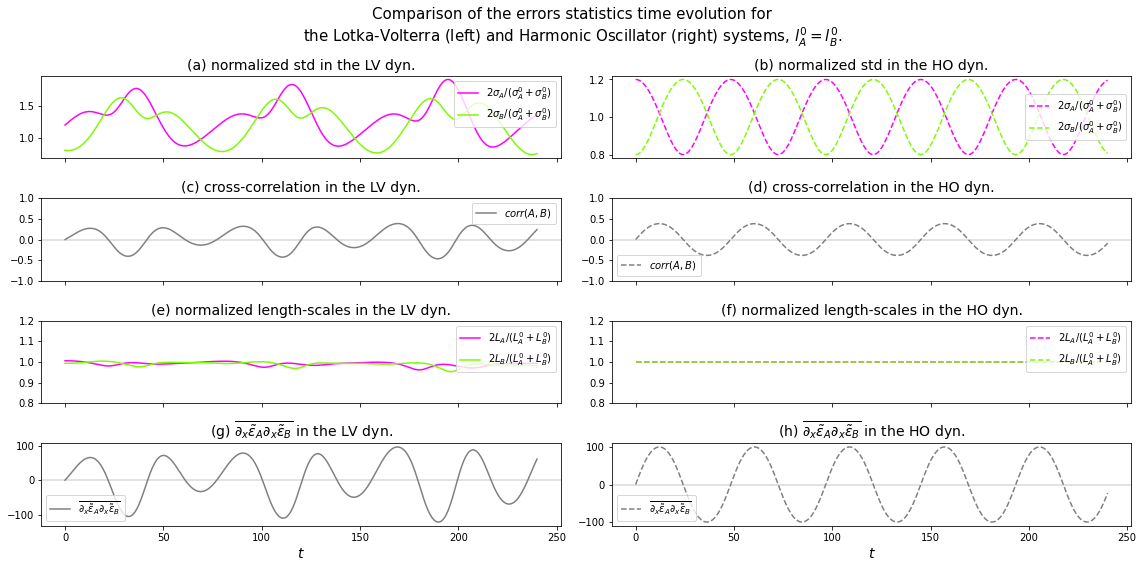

In [3]:
initial_setting['Length-scale A'] =  lh
initial_setting['Length-scale B'] =  lh

ensemble0 = make_bivariate_ensemble(ensemble_size, initial_setting, domain.x[0])

#ensemble forecast:
traj_enkf = enkf.ensemble_forecast(times, ensemble0, saved_times)
diag_enkf = diag_with_closures(traj_enkf)

fig = Comparison_Anisotropies_LV_HO(diag_enkf, initial_setting, enkf.k_2,
                             title='Comparison of the errors statistics time evolution for\n'+r'the Lotka-Volterra (left) and Harmonic Oscillator (right) systems, $l_A^0=l_B^0$.');
fig.savefig(f'../figures/Nx{Nx}/time_series_homogeneous_lh{str(lh)[2:]}.png');

In both the LV and HO problems, having identical initial length-scales implies no dynamics for the anisotropies (negligeable for the LV, due to numerical model error).

## 1.3 Numerical experiment : heterogeneous case 

In this experiment, the two chemical species have different initial length-scales. We compare results for the LV and the HO problems.

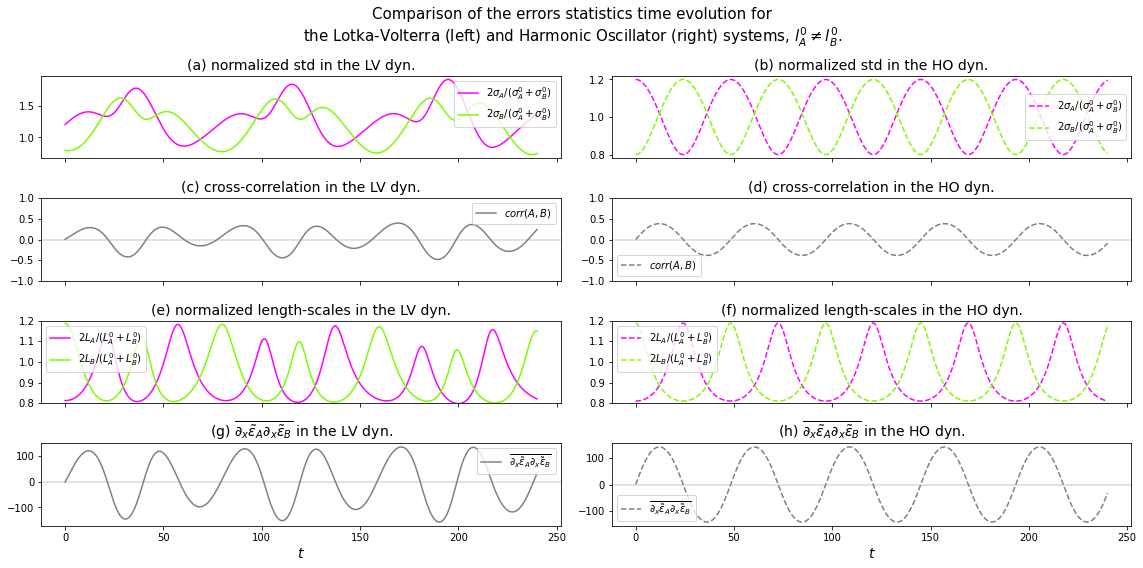

In [4]:
initial_setting['Length-scale A'] =  lhA
initial_setting['Length-scale B'] =  lhB

ensemble0 = make_bivariate_ensemble(ensemble_size, initial_setting, domain.x[0])

#ensemble forecast:
traj_enkf = enkf.ensemble_forecast(times, ensemble0, saved_times)
diag_enkf = diag_with_closures(traj_enkf)

fig = Comparison_Anisotropies_LV_HO(diag_enkf, initial_setting, enkf.k_2,
                             title='Comparison of the errors statistics time evolution for\n'+r'the Lotka-Volterra (left) and Harmonic Oscillator (right) systems, $l_A^0\neq l_B^0$.');
fig.savefig(f'../figures/Nx{Nx}/time_series_heterogeneous_lhA{str(lhA)[2:]}_lhB{str(lhB)[2:]}.png')

We now observe that the initial difference between the species length-scales induces a periodic dynamic for the anisotropies : the length-scales are in phase opposition.

# 2. Studying the contribution of the chemistry process in the overall anisotropy dynamics


We now try to quantify the importance of the chemistry process (that is how important the terms related to the chemistry) in the trend of the anisotropies. To do so, we consider the tranport problem coupled with the Lotka-Volterra chemical model. 3 cycles of assimilation are realized.

## 2.1 Numerical experiment settings

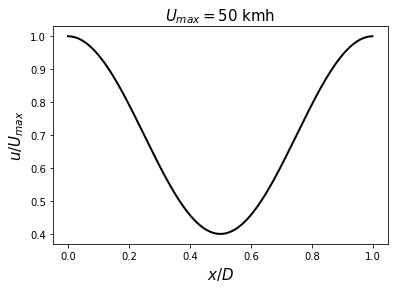

In [5]:
D = 1000  #km
u_amp = 15 #15#kmh
u_mean = 35  #kmh

u = (u_mean + u_amp*np.cos(2*np.pi*domain.x[0]))/D

Tadv = 1/u.mean()
t_end = 3.0*Tadv

enkf.u = u
enkf.set_dt(domain.dx[0]/u.max())
times = enkf.window(t_end, start=0)
saved_times = list(times[::10]) + [times[-1]]

plt.plot(domain.x[0], u/u.max(), c= 'k',linewidth=2)
plt.xlabel("$x/D$",fontsize=15); plt.ylabel("$u/U_{max}$",fontsize=15);
plt.title('$U_{max}=$'+ f'{int(u.max()*D)} kmh',fontsize=15);

## 2.2 Homogeneous case

In [6]:
initial_setting['Length-scale A'] =  lh
initial_setting['Length-scale B'] =  lh

ensemble0 = make_bivariate_ensemble(ensemble_size, initial_setting, domain.x[0])
#ensemble forecast:
traj_enkf = enkf.ensemble_forecast(times, ensemble0, saved_times)


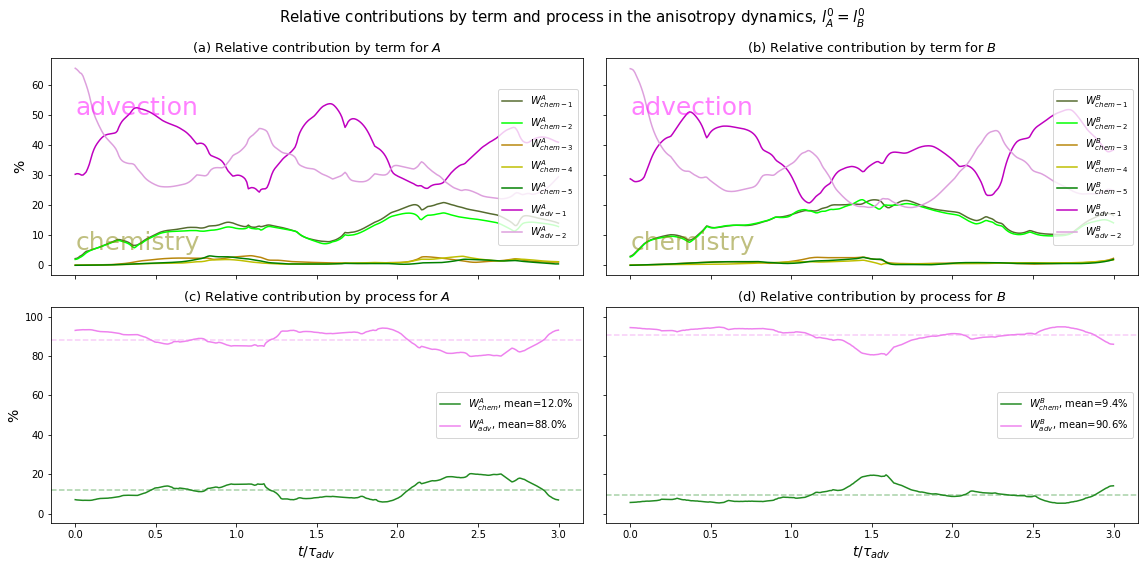

In [7]:
fig = quantify_process(diag_with_closures(traj_enkf),u,enkf.k_1,enkf.k_2,enkf.k_3, Tadv,
                       title=r'Relative contributions by term and process in the anisotropy dynamics, $l_A^0=l_B^0$',
                       text_height=50);

fig.savefig(f'../figures/Nx{Nx}/quantification_homogeneous_Nx{Nx}_lh{str(lh)[2:]}.png')

## 2.3 Heterogeneous case

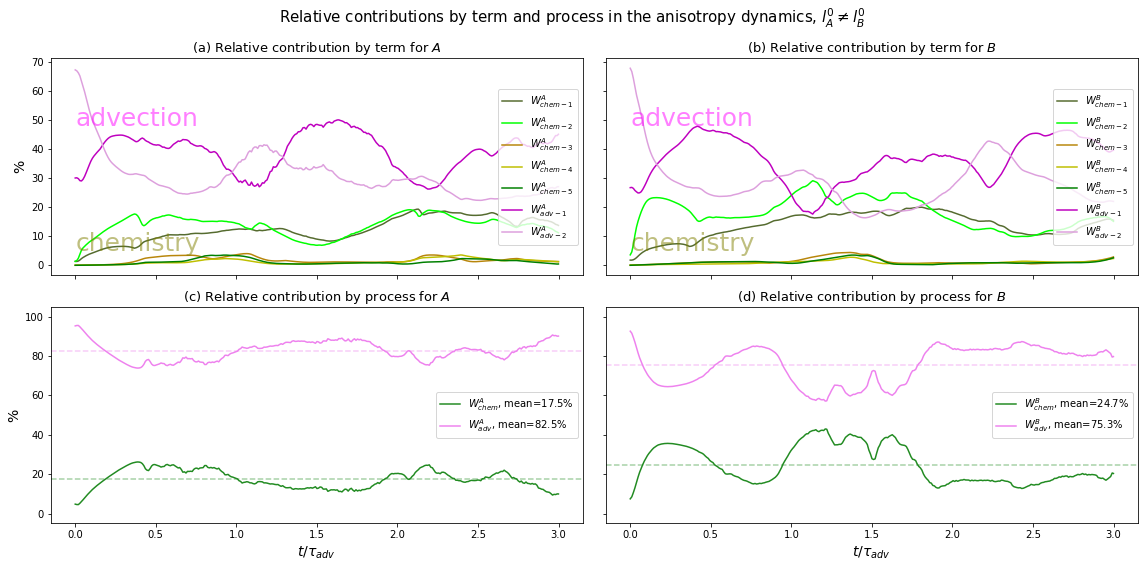

In [8]:
initial_setting['Length-scale A'] =  lhA
initial_setting['Length-scale B'] =  lhB

ensemble0 = make_bivariate_ensemble(ensemble_size, initial_setting, domain.x[0])
#ensemble forecast:
traj_enkf = enkf.ensemble_forecast(times, ensemble0, saved_times)

fig = quantify_process(diag_with_closures(traj_enkf),u,enkf.k_1,enkf.k_2,enkf.k_3, Tadv,
                       title=r'Relative contributions by term and process in the anisotropy dynamics, $l_A^0\neq l_B^0$',
                       text_height=48)
fig.savefig(f'../figures/Nx{Nx}/quantification_heterogeneous_Nx{Nx}_lhA{str(lhA)[2:]}_lhB{str(lhB)[2:]}')